<center>
Default of credit card clients

### Выполнил студент группы Ермаков Артем Александрович

### План исследования
 - Описание набора данных и признаков
 - Первичный анализ данных
 - Первичный визуальный анализ данных
 - Закономерности, особенности данных
 - Предобработка данных
 - Создание новых признаков и описание этого процесса
 - Кросс-валидация, подбор параметров
    - Выбор линейной модели
    - Построение метрической модели
    - Построение дерева решений
    - Ансамбли моделей: случайный лес, градиентный бустинг
 - Построение кривых валидации и обучения
 - Прогноз для отложенной выборки
 - Оценка модели с описанием выбранной метрики
 - Выводы

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,8)

###  Часть 1. Описание набора данных и признаков

In [7]:
# Чтение файла
df = pd.read_csv('data.csv', index_col='ID')

In [3]:
# Проверка, что файл прочитался нормально
df.head().T

ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0
PAY_5,-2,0,0,0,0


Каждая строка представляет собой одного клиента - это объект исследования.
Столбцы - признаки объекта.

Описание признаков объекта:
Limit bal: сумма выданного кредита в долларах.
Sex: Пол (1 = мужчина; 2 = Женщина).
Education: Образование (0 = без образования, 1 = старшая школа; 2 = университет; 3 = средняя школа; 4
= другое)
Marriage: семейное положение (1 = женат/замужем; 2 = холост; 3 = другое).
Age: Возраст ( в годах).
Pay0-Pay6: История прошлых платежей(С апреля по сентябрь 2005 года: PAY0 = статус погашения кредита
в сентябре 2005 года;...; PAY6 = состояние погашения кредита в апреле 2005 года. Статус погашения: -1 = оплата должным образом; 1 = задержка платежа
на один месяц; 2 = задержка платежа на два месяца;. . .; 8 = задержка платежа на
восемь месяцев; 9 = задержка платежа на девять месяцев и более.
BILL_AMT1-BILL_AMT6: сумма выписки по счету (в долларах). BILL_AMT1 =
сумма выписки счета в сентябре 2005 года;. . .; BILL_AMT6 = сумма счета в апреле 2005 года.
PAY_AMT1-PAY_AMT6: сумма предыдущего платежа (в долларах). PAY_AMT1 =
сумма, выплаченная в сентябре 2005 года; ... ; PAY_AMT6 = сумма, уплаченная в апреле 2005 года.

Целевая переменная: default payment next month - Заплатит ли клиент в след.месяце (1 - заплатит, 0 - нет)

In [7]:
Типы данных менять нет необходимости

SyntaxError: invalid syntax (<ipython-input-7-3589440970c5>, line 1)

###  Часть 2. Первичный анализ данных

In [8]:
#Просмотр типов данных
df.info()

# Все данные заполнены, пропусков нет.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [9]:
# Смотрим на статистические характеристики:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [10]:
#Посмотрим на число уникальных значений
df.nunique().T

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [11]:
# Посмотрим на кол-во объектов для каждого уникального значения
print(df['MARRIAGE'].value_counts()) #Чаще всего берут кредит холостые, на 2 месте в браке
print(df['EDUCATION'].value_counts())#Кто закончил старшую школу или универ чаще берут кредит
print(df['SEX'].value_counts())#Женищины немного чаще берут кредит

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    18112
1    11888
Name: SEX, dtype: int64


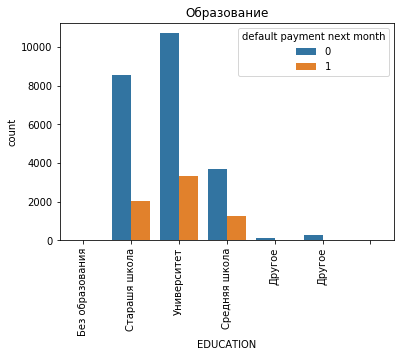

In [12]:
plt.title('Образование')
ax2 = sns.countplot(x= 'EDUCATION', hue = 'default payment next month', data = df)
ax2.set_xticklabels(['Без образования','Старашя школа','Университет','Средняя школа','Другое','Другое'],rotation = 90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


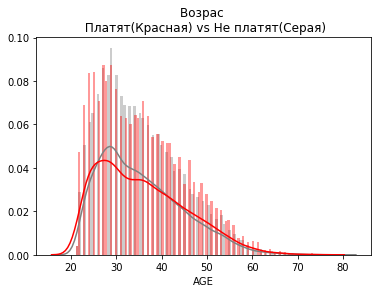

In [13]:
plt.title('Возрас \n Платят(Красная) vs Не платят(Серая)')
agedist0 = df[df['default payment next month']==0]['AGE']
agedist1 = df[df['default payment next month']==1]['AGE']
sns.distplot(agedist0, bins = 100, color = 'grey')
sns.distplot(agedist1, bins = 100, color = 'red')
plt.show()

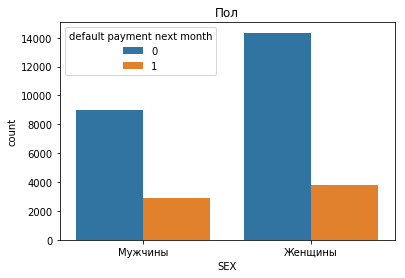

In [14]:
plt.title('Пол')
ax3 = sns.countplot(x= 'SEX', hue = 'default payment next month', data = df)
ax3.set_xticklabels(['Мужчины','Женщины'])
plt.show()

In [15]:
# Из графиков видно, что 
# 1.Те кто учился в университете или в средней илир старшей школе, платят, хотя всё равно много тех, кто не платит
# 2.Женщины чаще не платят
# 3.К 30 годам чаще не платят а ближе к 50 платят

AxesSubplot(0.125,0.125;0.775x0.755)
0    23364
1     6636
Name: default payment next month, dtype: int64


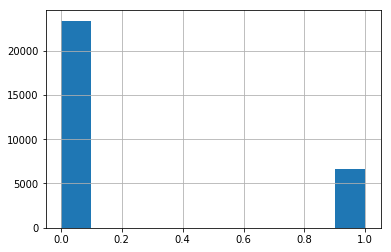

In [16]:
# Распределение целевой переменной
print(df['default payment next month'].hist())
print(df['default payment next month'].value_counts())

#Можно заметить что людей которые не платят вовремя почти в 4 раза больше.

###  Часть 3. Первичный визуальный анализ данных

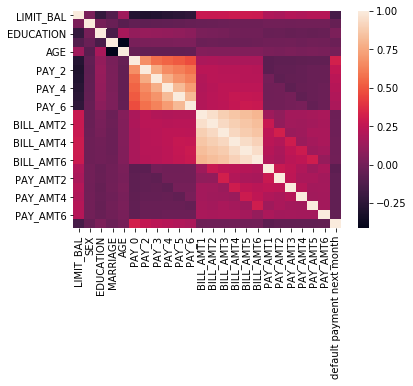

In [17]:
corr = df.corr()
sns.heatmap(corr)

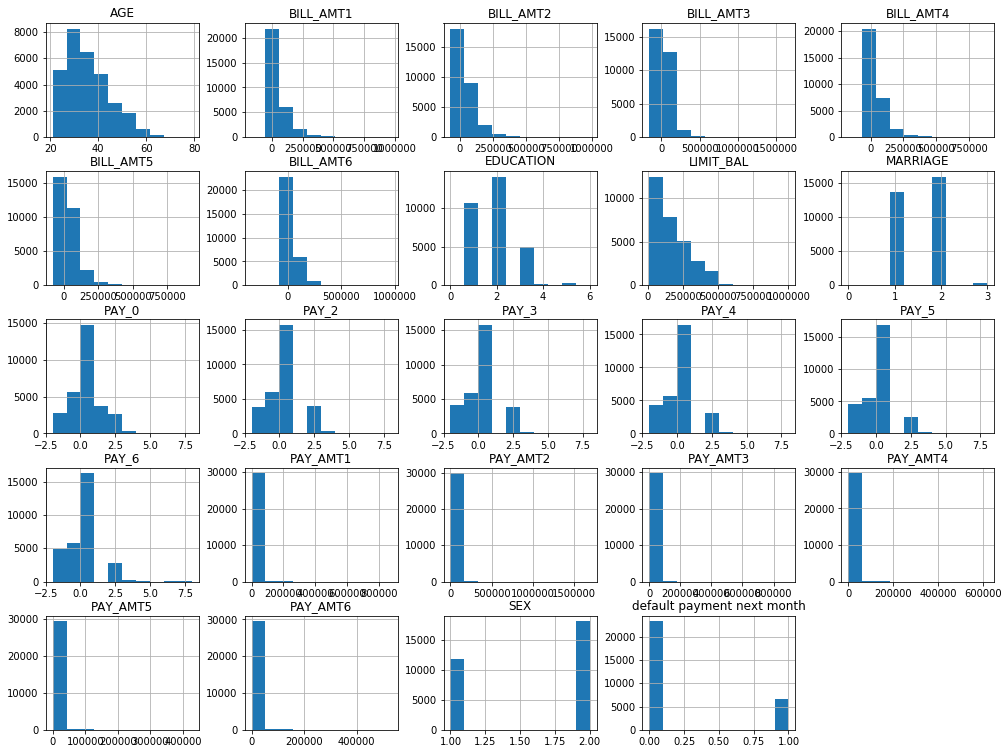

In [18]:
# Строим графики распределения признаков
plots = df.hist(figsize=(17,13))

###  Часть 4. Закономерности, особенности данных

### <center>Закономерности:</center>
1. Особо закономерностей не видно, можно заметить, что возраст имеет логарифмитически нормальное распределение, так же как и сумма кредита .
2. Кредиты берут преимущественно люди в браке.

###  Часть 5. Предобработка данных

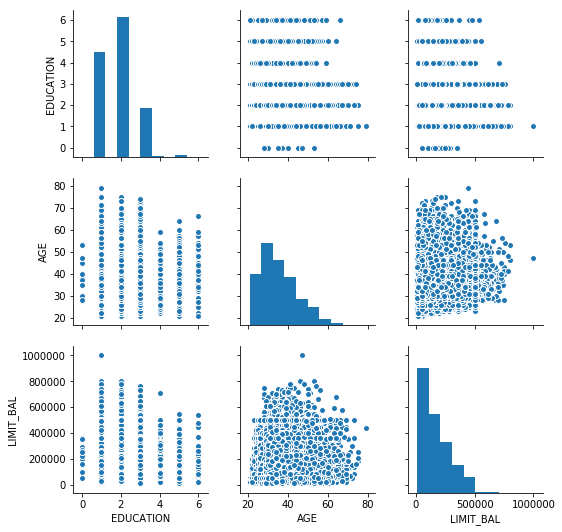

In [19]:
# Пробуем найти влияние образования, возраста и суммы кредита.
sns.pairplot(df[['EDUCATION', 'AGE', 'LIMIT_BAL',]])

# Зависимости не выявлено, отток клиентов по этим параметрам равномерен.
# Наблюдается линейная зависимость суммы оплаты от общей продолжительности разговоров.

In [8]:
# Созданрие выборок
X = df.columns[:24]
Y = df.columns[-1]

In [9]:
# Создание тестовых выборок
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[X],df[Y], 
                                                    test_size = .3, shuffle = True, random_state = 0) 

In [10]:
#Просмотрим данные
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 24)
(9000, 24)
(21000,)
(9000,)


###  Часть 6. Создание новых признаков и описание этого процесса

###  Часть 7. Кросс-валидация, подбор параметров и постоение модели

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [24]:
clfLR = LogisticRegression(solver = 'lbfgs',
                           max_iter = 500,
                          random_state = 0)

clfLR.fit(x_train,y_train)

predLR = clfLR.predict(x_test)

In [25]:
# Кросс валидация
cross_val_score_LR = cross_val_score(clfLR, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LR.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predLR).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predLR).round(4))

# F1 Score
print('f1 score is ',f1_score(y_test, predLR).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predLR).round(2))

cross_val_score:  0.78
precision score is  1.0
recall_score is  0.0005
f1 score is  0.001
ROC AUC is  0.5


In [ ]:
grid = {'C': np.power(10.0, np.arange(-5, 2))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs=GridSearchCV(clf,cv=cv,param_grid=grid,scoring='f1')
gs.fit(x_train,y_train)
bestC = gs.best_estimator_

In [ ]:
svcMod = svm.SVC(C = 0.1,random_state=241,kernel='linear')
svcMod.fit(x_train,y_train)

predSvc = SvcMod.predict(x_test)

In [ ]:
# Кросс валидация
cross_val_score_LR = cross_val_score(svcMod, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LR.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predSvc).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predSvc).round(4))

# F1 Score
print('f1 score is ',f1_score(y_test, predSvc).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predSvc).round(2))

In [26]:
clfKNN = KNeighborsClassifier(n_neighbors = 3)
clfKNN.fit(x_train,y_train)

predKNN = clfKNN.predict(x_test)

In [27]:
# Кросс валидация
cross_val_score_KNN = cross_val_score(clfKNN, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_KNN.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predKNN).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predKNN).round(4))

# F1 Score
print('f1 score is ',f1_score(y_test, predKNN).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predKNN).round(2))

cross_val_score:  0.74
precision score is  0.35
recall_score is  0.2309
f1 score is  0.277
ROC AUC is  0.56


In [12]:
clfRF = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 100,
                              random_state = 0)

clfRF.fit(x_train,y_train)

predRF = clfRF.predict(x_test)

In [13]:
# Кросс валидация
cross_val_score_RF = cross_val_score(clfRF, x_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_RF.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predRF).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predRF).round(4))

# F1 Score
print('f1 score is ',f1_score(y_test, predRF).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predRF).round(2))

cross_val_score:  1.0
precision score is  1.0
recall_score is  1.0
f1 score is  1.0
ROC AUC is  1.0


###  Часть 8. Оценка модели с описанием выбранной метрики

### Часть 9. Выводы 